# EDA - Bureau

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 0)

import missingno as msno
import seaborn as sns
from tqdm import tqdm
from IPython.display import display

sns.set_style('darkgrid')
tqdm.pandas()

import sys
sys.path.append('../')
from config import *

In [36]:
train = pd.read_feather('../input/application_train.ftr')[['SK_ID_CURR', 'TARGET']]
prev = pd.read_feather('../input/previous_application.ftr')

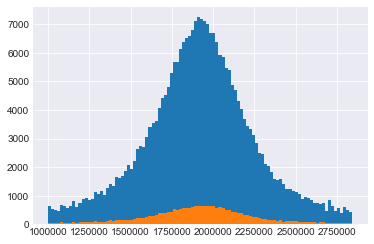

In [41]:
prev_group = prev.groupby('SK_ID_CURR', as_index=False).SK_ID_PREV.mean()

df = train.merge(prev_group, on='SK_ID_CURR')

df.loc[df.TARGET==0, 'SK_ID_PREV'].hist(bins=100)
df.loc[df.TARGET==1, 'SK_ID_PREV'].hist(bins=100)
plt.show()

In [27]:
df = pd.read_feather('../working/bureau_active_and_type_product_train.ftr')
df

,bureau_Active_Another type of loan_count,bureau_Active_Car loan_count,bureau_Active_Cash loan (non-earmarked)_count,bureau_Active_Consumer credit_count,bureau_Active_Credit card_count,bureau_Active_Loan for business development_count,bureau_Active_Loan for purchase of shares (margin lending)_count,bureau_Active_Loan for the purchase of equipment_count,bureau_Active_Loan for working capital replenishment_count,bureau_Active_Microloan_count,bureau_Active_Mobile operator loan_count,bureau_Active_Mortgage_count,bureau_Active_Real estate loan_count,bureau_Active_Unknown type of loan_count,bureau_Bad debt_Consumer credit_count,bureau_Bad debt_Credit card_count,bureau_Closed_Another type of loan_count,bureau_Closed_Car loan_count,bureau_Closed_Cash loan (non-earmarked)_count,bureau_Closed_Consumer credit_count,bureau_Closed_Credit card_count,bureau_Closed_Interbank credit_count,bureau_Closed_Loan for business development_count,bureau_Closed_Loan for purchase of shares (margin lending)_count,bureau_Closed_Loan for the purchase of equipment_count,bureau_Closed_Loan for working capital replenishment_count,bureau_Closed_Microloan_count,bureau_Closed_Mortgage_count,bureau_Closed_Real estate loan_count,bureau_Closed_Unknown type of loan_count,bureau_Sold_Another type of loan_count,bureau_Sold_Car loan_count,bureau_Sold_Cash loan (non-earmarked)_count,bureau_Sold_Consumer credit_count,bureau_Sold_Credit card_count,bureau_Sold_Loan for business development_count,bureau_Sold_Loan for working capital replenishment_count,bureau_Sold_Microloan_count,bureau_Sold_Mortgage_count,bureau_Sold_Real estate loan_count,bureau_Active_Another type of loan_ratio,bureau_Active_Car loan_ratio,bureau_Active_Cash loan (non-earmarked)_ratio,bureau_Active_Consumer credit_ratio,bureau_Active_Credit card_ratio,bureau_Active_Loan for business development_ratio,bureau_Active_Loan for purchase of shares (margin lending)_ratio,bureau_Active_Loan for the purchase of equipment_ratio,bureau_Active_Loan for working capital replenishment_ratio,bureau_Active_Microloan_ratio,bureau_Active_Mobile operator loan_ratio,bureau_Active_Mortgage_ratio,bureau_Active_Real estate loan_ratio,bureau_Active_Unknown type of loan_ratio,bureau_Bad debt_Consumer credit_ratio,bureau_Bad debt_Credit card_ratio,bureau_Closed_Another type of loan_ratio,bureau_Closed_Car loan_ratio,bureau_Closed_Cash loan (non-earmarked)_ratio,bureau_Closed_Consumer credit_ratio,bureau_Closed_Credit card_ratio,bureau_Closed_Interbank credit_ratio,bureau_Closed_Loan for business development_ratio,bureau_Closed_Loan for purchase of shares (margin lending)_ratio,bureau_Closed_Loan for the purchase of equipment_ratio,bureau_Closed_Loan for working capital replenishment_ratio,bureau_Closed_Microloan_ratio,bureau_Closed_Mortgage_ratio,bureau_Closed_Real estate loan_ratio,bureau_Closed_Unknown type of loan_ratio,bureau_Sold_Another type of loan_ratio,bureau_Sold_Car loan_ratio,bureau_Sold_Cash loan (non-earmarked)_ratio,bureau_Sold_Consumer credit_ratio,bureau_Sold_Credit card_ratio,bureau_Sold_Loan for business development_ratio,bureau_Sold_Loan for working capital replenishment_ratio,bureau_Sold_Microloan_ratio,bureau_Sold_Mortgage_ratio,bureau_Sold_Real estate loan_ratio
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.125000,0.125000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.375000,0.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.500000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0

In [31]:
df.loc[:, df.var() > 1e-3]

,bureau_Active_Car loan_count,bureau_Active_Consumer credit_count,bureau_Active_Credit card_count,bureau_Active_Loan for business development_count,bureau_Active_Microloan_count,bureau_Active_Mortgage_count,bureau_Closed_Another type of loan_count,bureau_Closed_Car loan_count,bureau_Closed_Consumer credit_count,bureau_Closed_Credit card_count,bureau_Closed_Loan for business development_count,bureau_Closed_Loan for working capital replenishment_count,bureau_Closed_Microloan_count,bureau_Closed_Mortgage_count,bureau_Closed_Unknown type of loan_count,bureau_Sold_Car loan_count,bureau_Sold_Consumer credit_count,bureau_Sold_Credit card_count,bureau_Sold_Mortgage_count,bureau_Active_Car loan_ratio,bureau_Active_Consumer credit_ratio,bureau_Active_Credit card_ratio,bureau_Active_Mortgage_ratio,bureau_Closed_Car loan_ratio,bureau_Closed_Consumer credit_ratio,bureau_Closed_Credit card_ratio,bureau_Closed_Microloan_ratio,bureau_Closed_Mortgage_ratio
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.125000,0.125000,0.000000,0.000000,0.375000,0.375000,0.0,0.00
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.250000,0.000000,0.000000,0.500000,0.250000,0.0,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.00
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.0,0.00
6,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.111111,0.111111,0.000000,0.000000,0.777778,0.000000,0.0,0.00
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.0,0.00
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
bureau = pd.read_feather(INPUT / 'bureau.ftr')
bureau_balance = pd.read_feather(INPUT / 'bureau_balance.ftr')
display(bureau.head())
display(bureau_balance.head())

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [25]:
bureau.query('CREDIT_ACTIVE=="Active"')

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248488,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.000,113166.000,0.000,0.0,Consumer credit,-6,4630.500
248490,100001,5896636,Active,currency 1,-320,0,411.0,NaN,NaN,0,168345.000,110281.500,NaN,0.0,Consumer credit,-10,9364.500
248489,100001,5896635,Active,currency 1,-49,0,1778.0,NaN,NaN,0,378000.000,373239.000,0.000,0.0,Consumer credit,-16,10822.500
1337779,100002,6158903,Active,currency 1,-1042,0,780.0,NaN,NaN,0,450000.000,245781.000,0.000,0.0,Consumer credit,-7,0.000
675689,100002,6158909,Active,currency 1,-103,0,NaN,NaN,40.500,0,31988.565,0.000,31988.565,0.0,Credit card,-24,0.000
1024669,100003,5885880,Active,currency 1,-606,0,1216.0,NaN,0.000,0,810000.000,0.000,810000.000,0.0,Credit card,-43,NaN
1421815,100005,6735201,Active,currency 1,-137,0,1324.0,NaN,NaN,0,568800.000,543087.000,0.000,0.0,Consumer credit,-11,0.000
1421816,100005,6735202,Active,currency 1,-62,0,122.0,NaN,0.000,0,29826.000,25321.500,0.000,0.0,Consumer credit,-31,4261.500
718762,100008,6491434,Active,currency 1,-78,0,471.0,NaN,0.000,0,267606.000,240057.000,0.000,0.0,Consumer credit,-16,NaN
1279723,100009,5651009,Active,currency 1,-1293,0,NaN,NaN,NaN,0,187200.000,0.000,NaN,0.0,Credit card,-847,NaN


In [24]:
bureau.CREDIT_TYPE.str.replace(' ', '_')

248487          Consumer_credit
248485          Consumer_credit
248486          Consumer_credit
248484          Consumer_credit
248488          Consumer_credit
248490          Consumer_credit
248489          Consumer_credit
675686          Consumer_credit
675684              Credit_card
675687          Consumer_credit
1486113             Credit_card
1337779         Consumer_credit
675688          Consumer_credit
675685              Credit_card
675689              Credit_card
1024666         Consumer_credit
1024667             Credit_card
1024668         Consumer_credit
1024669             Credit_card
363104          Consumer_credit
363105          Consumer_credit
1421814             Credit_card
1421815         Consumer_credit
1421816         Consumer_credit
1503966         Consumer_credit
718761          Consumer_credit
1616817         Consumer_credit
718762          Consumer_credit
1279720         Consumer_credit
1279725         Consumer_credit
                   ...         
1534302 

In [22]:
(bureau['CREDIT_ACTIVE'] + ' '+ bureau['CREDIT_TYPE']).str.replace(' ', '_')

248487          Closed_Consumer_credit
248485          Closed_Consumer_credit
248486          Closed_Consumer_credit
248484          Closed_Consumer_credit
248488          Active_Consumer_credit
248490          Active_Consumer_credit
248489          Active_Consumer_credit
675686          Closed_Consumer_credit
675684              Closed_Credit_card
675687          Closed_Consumer_credit
1486113             Closed_Credit_card
1337779         Active_Consumer_credit
675688          Closed_Consumer_credit
675685              Closed_Credit_card
675689              Active_Credit_card
1024666         Closed_Consumer_credit
1024667             Closed_Credit_card
1024668         Closed_Consumer_credit
1024669             Active_Credit_card
363104          Closed_Consumer_credit
363105          Closed_Consumer_credit
1421814             Closed_Credit_card
1421815         Active_Consumer_credit
1421816         Active_Consumer_credit
1503966         Closed_Consumer_credit
718761          Closed_Co

In [4]:
bureau.sort_values(['SK_ID_CURR', 'DAYS_CREDIT'], inplace=True)

In [ ]:
count = bureau.groupby('SK_ID_CURR').CREDIT_ACTIVE.value_counts().unstack()

In [43]:
bureau_balance.groupby('SK_ID_BUREAU').head(1)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
27,5715449,0,C
39,5715451,-5,C
65,5715452,0,C
98,5715453,0,C
136,5715454,-15,C
175,5715455,-49,X
213,5715456,-21,X
240,5715457,0,0
248,5715458,0,C


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d978400>,
      dtype=object)

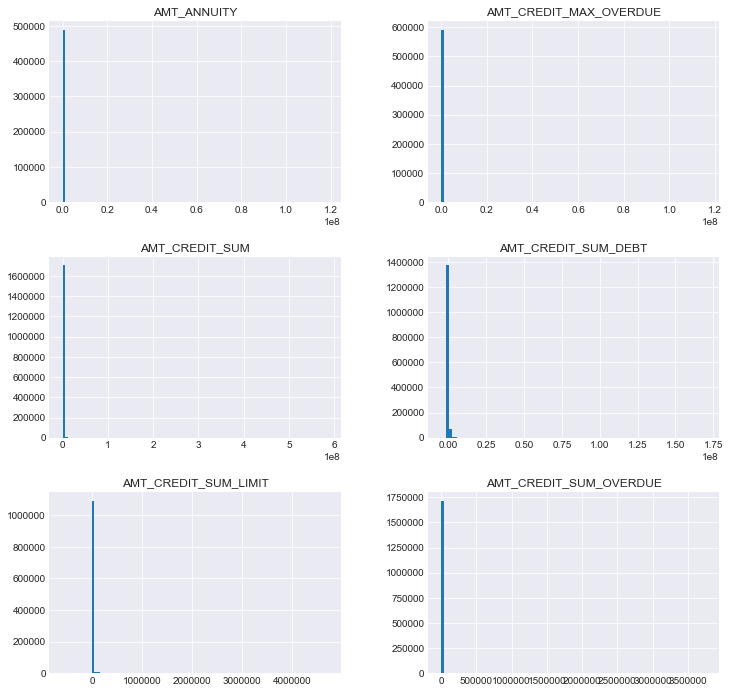

In [14]:
bureau.filter(regex='AMT_').hist(bins=100, figsize=(12, 12))

In [16]:
bureau.filter(regex='AMT_').min()

AMT_CREDIT_MAX_OVERDUE          0.000
AMT_CREDIT_SUM                  0.000
AMT_CREDIT_SUM_DEBT      -4705600.320
AMT_CREDIT_SUM_LIMIT      -586406.115
AMT_CREDIT_SUM_OVERDUE          0.000
AMT_ANNUITY                     0.000
dtype: float64

In [20]:
bureau[bureau.AMT_CREDIT_SUM_DEBT < 0]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
272931,100044,5057756,Active,currency 1,-1827,0,660.0,NaN,18406.935,0,135000.0,-130.005,418630.005,0.0,Credit card,-651,NaN
272932,100044,5057757,Active,currency 1,-1739,0,1178.0,NaN,1125.000,0,22500.0,-78.885,247578.885,0.0,Credit card,-654,NaN
911914,100094,5676240,Closed,currency 1,-1049,0,-379.0,-530.0,0.000,0,4500.0,-0.405,4500.405,0.0,Credit card,-530,NaN
1417579,100138,6173245,Active,currency 1,-964,0,818.0,NaN,0.000,0,0.0,-44390.565,44390.565,0.0,Credit card,-690,NaN
948672,100190,5827339,Active,currency 1,-833,0,975.0,NaN,0.000,0,0.0,-56.790,56.790,0.0,Credit card,-620,NaN
948673,100190,5827340,Closed,currency 1,-809,0,1006.0,-649.0,0.000,0,135000.0,-20.970,135020.970,0.0,Credit card,-649,NaN
1709304,100219,5031754,Active,currency 1,-1033,0,768.0,NaN,0.000,0,0.0,-88.830,88.830,0.0,Credit card,-668,NaN
1101940,100251,5777090,Closed,currency 1,-1741,0,800.0,-525.0,0.000,0,0.0,-4197.195,4197.195,0.0,Credit card,-525,NaN
1101941,100251,5777091,Closed,currency 1,-1734,0,-630.0,-920.0,13768.965,0,135000.0,-39.510,39.510,0.0,Credit card,-920,NaN
1493736,100254,6336844,Closed,currency 1,-2188,0,-1459.0,-1708.0,20592.990,0,225000.0,-12.420,225012.420,0.0,Credit card,-1708,NaN


In [15]:
buro_bal = bureau_balance.groupby('SK_ID_BUREAU') \
    .STATUS.value_counts().unstack('STATUS').fillna(0).astype(int)

buro_bal.columns = 'status_' + buro_bal.columns + '_cnt'

buro_bal['months_cnt'] = bureau_balance.groupby('SK_ID_BUREAU').MONTHS_BALANCE.size()
buro_bal['months_max'] = bureau_balance.groupby('SK_ID_BUREAU').MONTHS_BALANCE.max()
buro_bal['months_min'] = bureau_balance.groupby('SK_ID_BUREAU').MONTHS_BALANCE.min()

for f in tqdm(buro_bal.filter(regex='status_').columns):
    buro_bal[f.replace('_cnt', '_ratio')] = buro_bal[f] / buro_bal.months_cnt

buro = bureau.merge(buro_bal.reset_index(), how='left', on='SK_ID_BUREAU')

100%|██████████| 8/8 [00:00<00:00, 129.31it/s]


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
buro_cat = [f for f in buro.columns if buro[f].dtype == 'object']
for f in tqdm(buro_cat):
    buro[f] = le.fit_transform(buro[f].astype(str))
    nunique = buro[['SK_ID_CURR', f]].groupby('SK_ID_CURR').nunique()
    nunique = nunique[f].reset_index().rename(columns={f: 'nunique_'+f})
    buro = buro.merge(nunique, on='SK_ID_CURR', how='left')
    buro.drop(f, axis=1, inplace=True)

100%|██████████| 3/3 [00:25<00:00,  8.48s/it]


In [21]:
avg_buro = buro.groupby('SK_ID_CURR').mean()

In [24]:
train = pd.read_feather(INPUT / 'application_train.ftr')
test = pd.read_feather(INPUT / 'application_test.ftr')

In [28]:
avg_buro.drop('SK_ID_BUREAU', axis=1, inplace=True)
avg_buro.columns = 'bureau_' + avg_buro.columns

In [32]:
train.merge(avg_buro, left_on='SK_ID_CURR', right_index=True, how='left').filter(regex='bureau_')

,bureau_DAYS_CREDIT,bureau_CREDIT_DAY_OVERDUE,bureau_DAYS_CREDIT_ENDDATE,bureau_DAYS_ENDDATE_FACT,bureau_AMT_CREDIT_MAX_OVERDUE,bureau_CNT_CREDIT_PROLONG,bureau_AMT_CREDIT_SUM,bureau_AMT_CREDIT_SUM_DEBT,bureau_AMT_CREDIT_SUM_LIMIT,bureau_AMT_CREDIT_SUM_OVERDUE,bureau_DAYS_CREDIT_UPDATE,bureau_AMT_ANNUITY,bureau_status_0_cnt,bureau_status_1_cnt,bureau_status_2_cnt,bureau_status_3_cnt,bureau_status_4_cnt,bureau_status_5_cnt,bureau_status_C_cnt,bureau_status_X_cnt,bureau_months_cnt,bureau_months_max,bureau_months_min,bureau_status_0_ratio,bureau_status_1_ratio,bureau_status_2_ratio,bureau_status_3_ratio,bureau_status_4_ratio,bureau_status_5_ratio,bureau_status_C_ratio,bureau_status_X_ratio,bureau_nunique_CREDIT_ACTIVE,bureau_nunique_CREDIT_CURRENCY,bureau_nunique_CREDIT_TYPE
0,-874.000000,0.0,-349.000000,-697.500000,1681.029000,0.000000,1.081319e+05,4.915620e+04,7997.14125,0.000,-499.875000,0.000000,5.625000,3.375000,0.000000,0.000000,0.000000,0.000000,2.875000,1.875000,13.750000,-15.500000,-28.250000,0.406960,0.255682,0.000000,0.00000,0.00000,0.00000,0.175426,0.161932,2.0,1.0,2.0
1,-1400.750000,0.0,-544.500000,-1097.333333,0.000000,0.000000,2.543501e+05,0.000000e+00,202500.00000,0.000,-816.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0
2,-867.000000,0.0,-488.500000,-532.500000,0.000000,0.000000,9.451890e+04,0.000000e+00,0.00000,0.000,-532.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1149.000000,0.0,-783.000000,-783.000000,0.000000,0.000000,1.462500e+05,0.000000e+00,0.00000,0.000,-783.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
5,-757.333333,0.0,-391.333333,-909.000000,0.000000,0.000000,1.561485e+05,8.001900e+04,0.00000,0.000,-611.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0
6,-1271.500000,0.0,-794.937500,-1108.500000,0.000000,0.000000,2.667118e+05,7.695354e+04,0.00000,0.000,-851.611111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0
7,-1939.500000,0.0,-119.500000,-1138.000000,NaN,0.000000,4.950000e+05,1.740038e+05,0.00000,0.000,-578.000000,NaN,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,36.000000,-28.500000,-63.500000,0.277778,0.000000,0.000000,0.00000,0.00000,0.00000,0.722222,0.000000,2.0,1.0,2.0
8,-1773.000000,0.0,-1293.250000,-1463.250000,5073.615000,0.000000,1.088071e+05,0.000000e+00,0.00000,0.000,-1454.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df = pd.read_feather(WORKING / 'bureau_train.ftr')

In [35]:
df.shape

(307511, 36)

In [16]:
buro.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,status_0_cnt,status_1_cnt,status_2_cnt,status_3_cnt,status_4_cnt,status_5_cnt,status_C_cnt,status_X_cnt,months_cnt,months_max,months_min,status_0_ratio,status_1_ratio,status_2_ratio,status_3_ratio,status_4_ratio,status_5_ratio,status_C_ratio,status_X_ratio
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bureau_balance.STATUS.value_counts()

In [ ]:
msno.matrix(bureau.sample(300))
plt.show()

msno.heatmap(bureau)
plt.show()

In [ ]:
counts = bureau.SK_ID_CURR.value_counts()
counts.hist(bins=counts.max()-counts.min())
plt.title('SK_ID_CURR counts')
plt.show()

In [ ]:
bureau.DAYS_CREDIT.hist(bins=100)
plt.title('DAYS_CREDIT hist')
plt.show()

In [ ]:
plt.hist(bureau.CREDIT_DAY_OVERDUE, bins=100, log=True)
plt.show()

In [ ]:
bureau[['SK_ID_CURR', 'CNT_CREDIT_PROLONG']].groupby('SK_ID_CURR').CNT_CREDIT_PROLONG.max().value_counts().sort_index()

In [ ]:
bureau.AMT_CREDIT_SUM.hist(bins=100, log=True)

In [ ]:
np.log1p(bureau[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby('SK_ID_CURR').mean()).hist(bins=100)
plt.show()

In [ ]:
np.log1p(bureau.AMT_CREDIT_SUM_DEBT[bureau.AMT_CREDIT_SUM_DEBT!=0]).hist(bins=100)
plt.show()

In [ ]:
np.log1p(bureau.AMT_CREDIT_SUM_LIMIT[bureau.AMT_CREDIT_SUM_LIMIT!=0]).hist(bins=100)

In [ ]:
bureau.CREDIT_TYPE.value_counts()

In [ ]:
bureau.DAYS_CREDIT_ENDDATE.hist(bins=100, log=True)

In [ ]:
bureau.CREDIT_CURRENCY.value_counts()

In [ ]:
bureau.CREDIT_ACTIVE.value_counts()

In [ ]:
nunique = bureau[['SK_ID_CURR', 'CREDIT_ACTIVE']].groupby('SK_ID_CURR').CREDIT_ACTIVE.nunique()
nunique.value_counts()

In [ ]:
bureau

In [ ]:
bureau.query("SK_ID_CURR in @nunique.to_frame().query('CREDIT_ACTIVE==1').index")

In [ ]:
bureau[['SK_ID_CURR', 'CREDIT_ACTIVE']].groupby('SK_ID_CURR').